In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas_profiling import ProfileReport

dataset_path = './dataset'

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(dataset_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

./dataset/.DS_Store
./dataset/mean-body-mass-index-bmi-in-adult-males.csv
./dataset/mean-body-mass-index-bmi-in-adult-women.csv
./dataset/SearchTrend.csv
./dataset/Weather.csv
./dataset/Region.csv
./dataset/Case.csv
./dataset/Time/TimeAge.csv
./dataset/Time/TimeProvince.csv
./dataset/Time/TimeGender.csv
./dataset/Time/Time.csv
./dataset/Patient/PatientRoute.csv
./dataset/Patient/PatientInfo.csv


In [40]:
sns.set(rc={'figure.figsize':(11, 4)})
import warnings
warnings.filterwarnings("ignore")

## Read Data

In [2]:
patient_path = os.path.join(dataset_path, "Patient")
time_path = os.path.join(dataset_path, "Time")

case = pd.read_csv(dataset_path+'/Case.csv')
p_info = pd.read_csv(patient_path+'/PatientInfo.csv')
p_route = pd.read_csv(patient_path+'/PatientRoute.csv')
time = pd.read_csv(time_path+'/Time.csv')
t_age = pd.read_csv(time_path+'/TimeAge.csv')
t_gender = pd.read_csv(time_path+'/TimeGender.csv')
t_provin = pd.read_csv(time_path+'/TimeProvince.csv')
region = pd.read_csv(dataset_path+'/Region.csv')
weather = pd.read_csv(dataset_path+'/Weather.csv')
search = pd.read_csv(dataset_path+'/SearchTrend.csv')

In [3]:
new_dataset = "Covid19_Dataset"
seoul_path = os.path.join(new_dataset, "Seoul")

patients = pd.read_csv(new_dataset + "/patients.csv")
routes = pd.read_csv(new_dataset + "/routes.csv")

## Visualize Time-Series


In [16]:
# Change dtypes to datetime 
time["date"] = pd.to_datetime(time["date"])
t_age["date"] = pd.to_datetime(t_age["date"])
t_gender["date"] = pd.to_datetime(t_gender["date"])
t_provin["date"] = pd.to_datetime(t_provin["date"])
weather["date"] = pd.to_datetime(weather["date"])

In [20]:
# make dates the index for time-series
time.set_index("date", inplace=True)
t_age.set_index("date", inplace=True)
t_gender.set_index("date", inplace=True)
t_provin.set_index("date", inplace=True)
weather.set_index("date", inplace=True)


In [21]:
display(time)
display(t_age)
display(t_gender)
display(t_provin)
display(weather)

,time,test,negative,confirmed,released,deceased
date,,,,,,
2020-01-20,16,1,0,1,0,0
2020-01-21,16,1,0,1,0,0
2020-01-22,16,4,3,1,0,0
2020-01-23,16,22,21,1,0,0
2020-01-24,16,27,25,2,0,0
...,...,...,...,...,...,...
2020-03-16,0,274504,251297,8236,1137,75
2020-03-17,0,286716,261105,8320,1401,81
2020-03-18,0,295647,270888,8413,1540,84


,time,age,confirmed,deceased
date,,,,
2020-03-02,0,0s,32,0
2020-03-02,0,10s,169,0
2020-03-02,0,20s,1235,0
2020-03-02,0,30s,506,1
2020-03-02,0,40s,633,1
...,...,...,...,...
2020-03-20,0,40s,1193,1
2020-03-20,0,50s,1656,7
2020-03-20,0,60s,1099,17


,time,sex,confirmed,deceased
date,,,,
2020-03-02,0,male,1591,13
2020-03-02,0,female,2621,9
2020-03-03,0,male,1810,16
2020-03-03,0,female,3002,12
2020-03-04,0,male,1996,20
2020-03-04,0,female,3332,12
2020-03-05,0,male,2149,21
2020-03-05,0,female,3617,14
2020-03-06,0,male,2345,25


,time,province,confirmed,released,deceased
date,,,,,
2020-01-20,16,Seoul,0,0,0
2020-01-20,16,Busan,0,0,0
2020-01-20,16,Daegu,0,0,0
2020-01-20,16,Incheon,1,0,0
2020-01-20,16,Gwangju,0,0,0
...,...,...,...,...,...
2020-03-20,0,Jeollabuk-do,3,7,0
2020-03-20,0,Jeollanam-do,2,3,0
2020-03-20,0,Gyeongsangbuk-do,841,340,22


,code,province,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
date,,,,,,,,,
2016-03-17,10000,Seoul,9.3,2.0,14.7,0.0,3.2,70.0,40.9
2016-03-18,10000,Seoul,13.4,8.8,20.1,0.0,5.0,110.0,50.0
2016-03-19,10000,Seoul,11.4,6.6,18.1,0.0,4.8,320.0,58.3
2016-03-20,10000,Seoul,10.6,4.9,17.5,0.0,4.6,320.0,54.0
2016-03-21,10000,Seoul,9.9,5.5,16.1,0.0,5.4,320.0,54.1
...,...,...,...,...,...,...,...,...,...
2020-03-12,70000,Jeju-do,9.4,3.8,13.7,0.0,3.2,160.0,58.9
2020-03-13,70000,Jeju-do,11.2,8.2,14.5,0.0,5.7,320.0,56.8
2020-03-14,70000,Jeju-do,8.4,5.9,10.6,0.0,7.0,320.0,48.6


In [43]:
# filter weather data to 2020 data only where first cases are found
weather = weather.loc[weather.index >= "2020-01-20"]

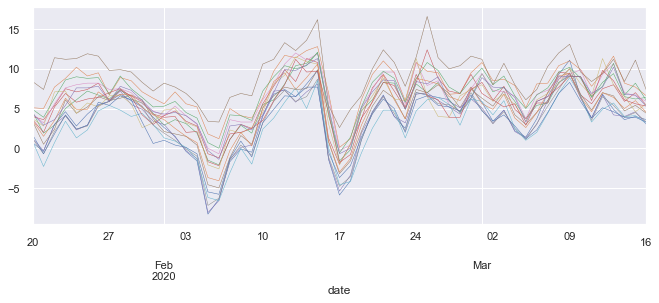

In [44]:
# Visualize weather by province
for province in weather["province"].unique():
    local_weather = weather[weather["province"] == province]
    local_weather["avg_temp"].plot(linewidth=0.5)

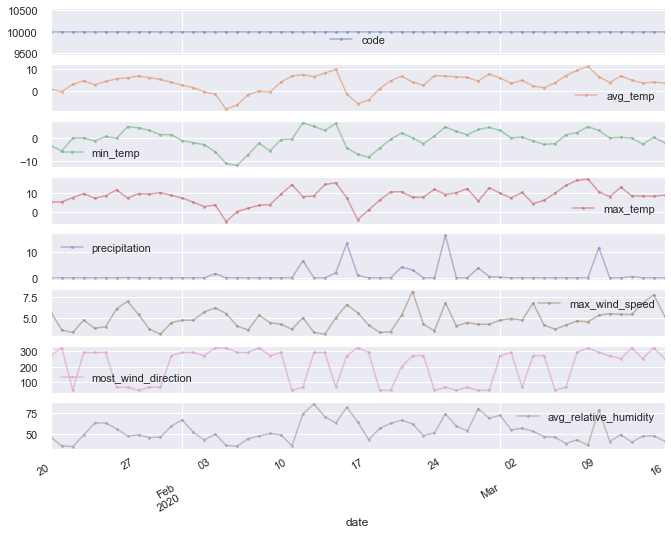

In [45]:
# Concentrate on Seoul
seoul_weather = weather[weather["province"] == "Seoul"]
cols = seoul_weather.columns.values
axes = seoul_weather[cols].plot(marker='.', alpha=0.5, figsize=(11, 9), subplots=True)
    

In [50]:
# add log scale column for confirmed cases
time["confirmed_log"] = np.log(time["confirmed"].values)

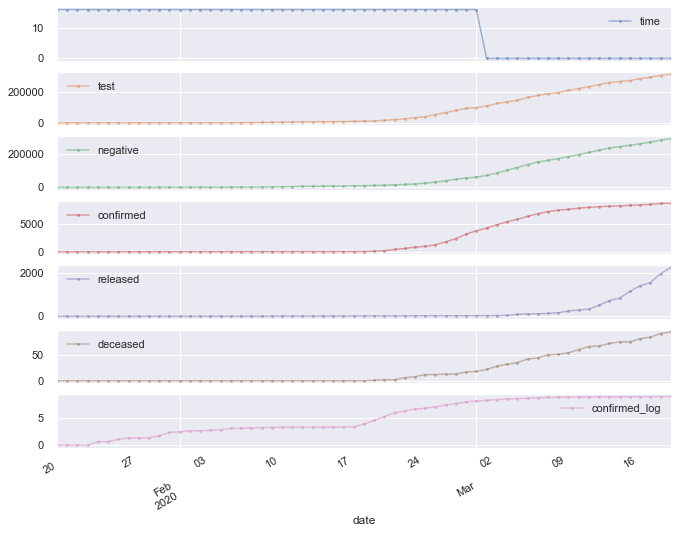

In [51]:
#Visualize cases
time_cols = time.columns.values
axes = time[time_cols].plot(marker='.', alpha=0.5, figsize=(11, 9), subplots=True)

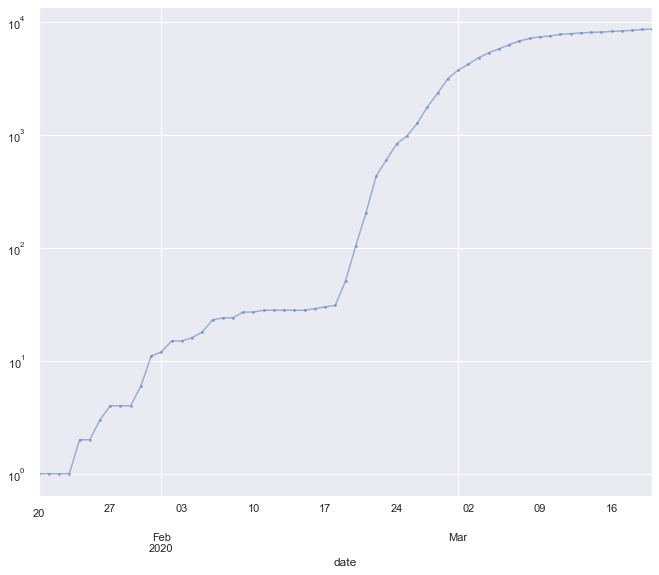

In [53]:
time["confirmed"].plot(marker='.', alpha=0.5, figsize=(11, 9), logy=True)

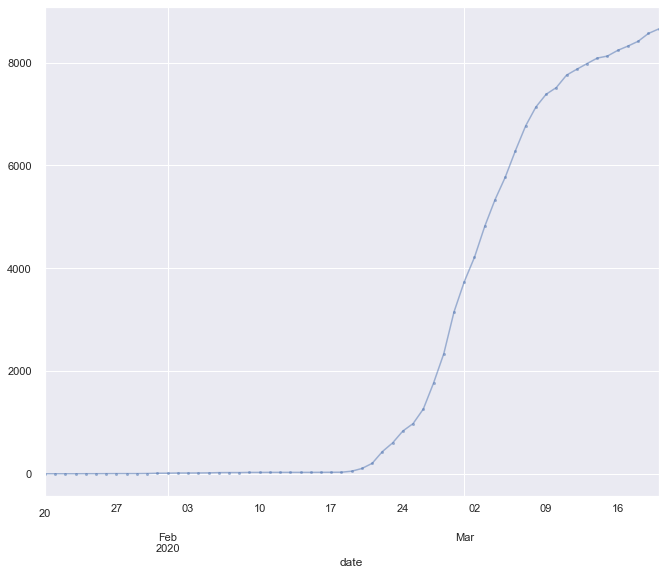

In [54]:
time["confirmed"].plot(marker='.', alpha=0.5, figsize=(11, 9))

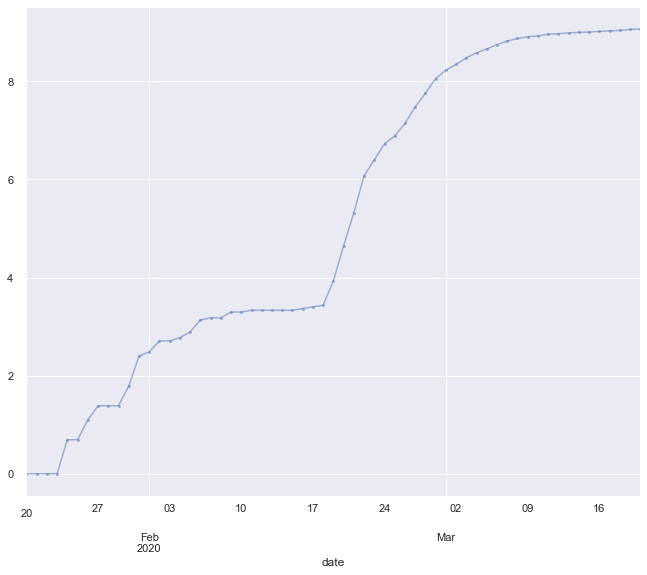

In [55]:
time["confirmed_log"].plot(marker='.', alpha=0.5, figsize=(11, 9))

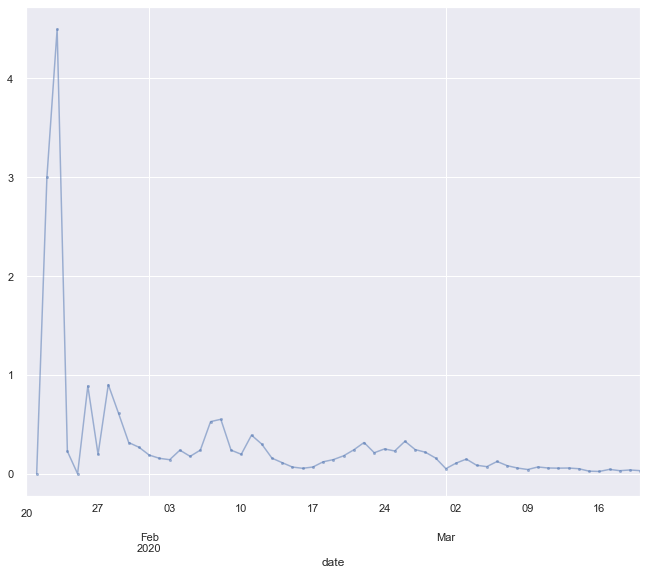

In [63]:
time["test"].pct_change().plot(marker='.', alpha=0.5, figsize=(11, 9))

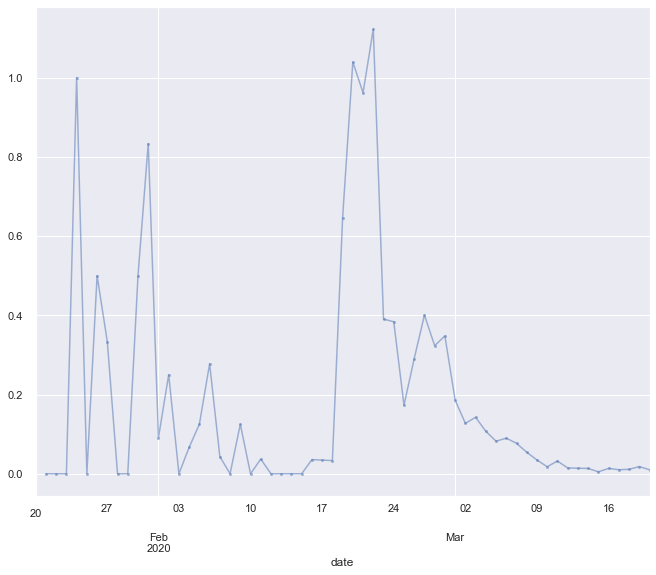

In [58]:
time["confirmed"].pct_change().plot(marker='.', alpha=0.5, figsize=(11, 9))

In [61]:
time[time["confirmed"].pct_change() == 0.39030023094688215]

,time,test,negative,confirmed,released,deceased,confirmed_log
date,,,,,,,
2020-02-23,16,26179,17520,602,18,6,6.400257


In [62]:
time[time["confirmed"].pct_change() > 1]

,time,test,negative,confirmed,released,deceased,confirmed_log
date,,,,,,,
2020-02-20,16,13202,11238,104,16,1,4.644391
2020-02-22,16,21586,15116,433,18,2,6.070738
